<a href="https://colab.research.google.com/github/porchportal/Finance-Prediction-model-/blob/main/EachStockOnMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

import yfinance as yf

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [24]:
from datetime import datetime
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly

#prepare

Begin_data = '2000-1-1'
Today_data = datetime.now().strftime('%Y-%m-%d')
stock = "AAPL"

NameC = yf.Ticker(stock)
data = yf.download(stock, Begin_data, Today_data)

[*********************100%%**********************]  1 of 1 completed


# Prophet

In [25]:
data.reset_index(inplace=True)
data

Date        Open        High         Low       Close   Adj Close  \
0    2000-01-03    0.936384    1.004464    0.907924    0.999442    0.847207   
1    2000-01-04    0.966518    0.987723    0.903460    0.915179    0.775779   
2    2000-01-05    0.926339    0.987165    0.919643    0.928571    0.787131   
3    2000-01-06    0.947545    0.955357    0.848214    0.848214    0.719014   
4    2000-01-07    0.861607    0.901786    0.852679    0.888393    0.753073   
...         ...         ...         ...         ...         ...         ...   
6023 2023-12-11  193.110001  193.490005  191.419998  193.179993  193.179993   
6024 2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
6025 2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
6026 2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
6027 2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   

         Volume  
0     535796800  
1     512377600  
2     778321600  
3     767972800  
4     460734400  
...         ...  
6023   60943700  
6024   52696900  
6025   70404200  
6026   66831600  
6027  128256700  

[6028 rows x 7 columns]

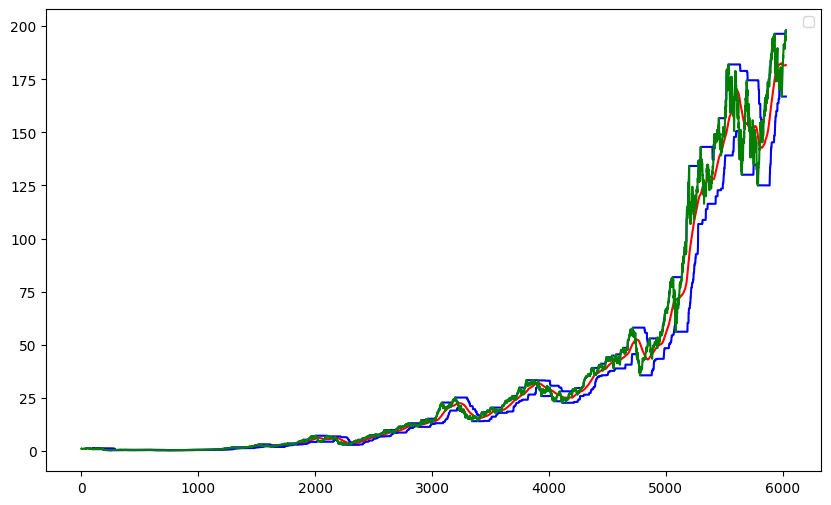

In [26]:
ma_100_days = data.Close.rolling(100).mean()
ma_MIN = data.Close.rolling(100).min()
ma_MAX = data.Close.rolling(100).max()

plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_MIN,'b')
plt.plot(ma_MAX,'b')
plt.plot(data.Close, 'g')
plt.legend()
plt.show()

In [27]:
def load_data(Begin_data = Begin_data, company = NameC):

  history = company.history(start= Begin_data, end= Today_data).reset_index()[['Date','Close']].rename(columns = {'Date':'ds', 'Close':'y'})
  history.ds = history.ds.dt.tz_convert(None)

  return history;

class Premodel1():

    def __init__(self, Begin_data=Begin_data, company=NameC, periods=365, loader=load_data):
        self.Begin = Begin_data
        self.company = company
        self.periods = periods
        self.data = loader(self.Begin, self.company)

        self.model = Prophet()  # MODEL
        self.model.fit(self.data)  # fit data to model

        future = self.model.make_future_dataframe(periods=self.periods)
        self.hist = self.model.predict(future)  # predict dataframe

        self.pred = self.hist[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        self.components = self.hist[['ds', 'trend', 'trend_lower', 'trend_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper']]

    def plotpred(self):
        return plot_plotly(self.model, self.hist, xlabel='Date', ylabel='Closing Price')

    def plotcomponents(self):
        return plot_components_plotly(self.model, self.hist)


In [28]:
model = Premodel1()
model.plotpred()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb60muown/igrll9_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb60muown/frq5y16s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17289', 'data', 'file=/tmp/tmpb60muown/igrll9_r.json', 'init=/tmp/tmpb60muown/frq5y16s.json', 'output', 'file=/tmp/tmpb60muown/prophet_model52redbh_/prophet_model-20231218050222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:02:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


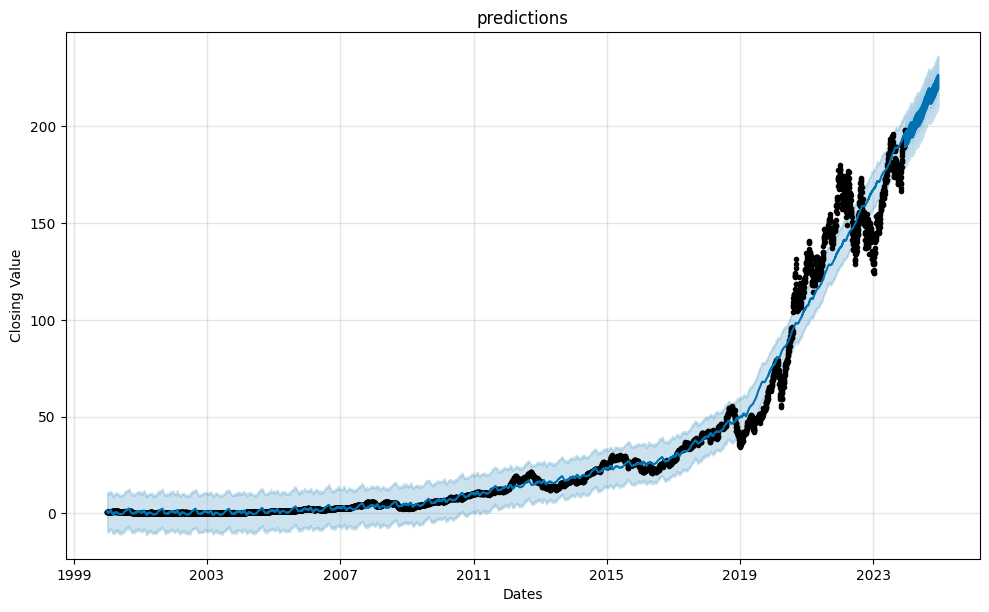

In [29]:
model.model.plot(model.hist)
plt.xlabel('Dates')
plt.ylabel('Closing Value')
plt.title('predictions');

In [30]:
model.plotcomponents()

In [31]:
# Initialize Premodel1 with the calculated periods for prediction up to 2030
premodel = Premodel1(periods=11322)

premodel.plotpred()  # This will plot the predictions

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb60muown/pkm_lg4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb60muown/5o2yo2d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69133', 'data', 'file=/tmp/tmpb60muown/pkm_lg4c.json', 'init=/tmp/tmpb60muown/5o2yo2d9.json', 'output', 'file=/tmp/tmpb60muown/prophet_modelshj4u7fu/prophet_model-20231218050228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:02:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


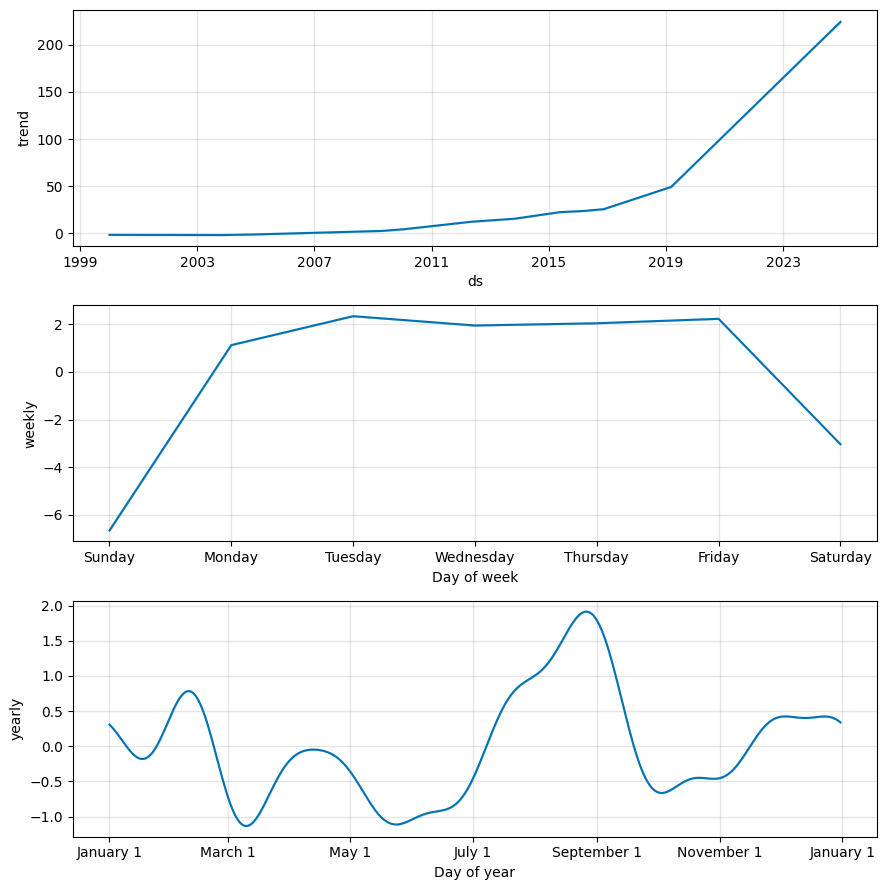

In [32]:
 model.model.plot_components(model.hist,);

In [33]:
def load_data_norm(Begin_data = Begin_data, company = NameC):

    history = company.history(start=Begin_data, end=Today_data).reset_index()[['Date','Close']].rename(columns = {'Date':'ds', 'Close':'y'}) #data mast have ds and y columns
    history.ds = history.ds.dt.tz_convert(None)
    mean = history.y.mean(axis=0)
    std = history.y.std(axis=0)
    history['y'] = (history['y'] - mean)/std

    return history

def load_data_minmax(Begin_data = Begin_data, company = NameC):

    history = company.history(start=Begin_data, end=Today_data).reset_index()[['Date','Close']].rename(columns = {'Date':'ds', 'Close':'y'}) #data mast have ds and y columns
    history.ds = history.ds.dt.tz_convert(None)
    history['y'] = (history['y'] - history['y'].min()) / (history['y'].max() - history['y'].min())

    return history

In [34]:
def load_val(Begin_data = Begin_data, company = NameC):
    data = load_data_norm(Begin_data, company)
    train_data = data[:len(data)-20]                    #last 20 days

    return train_data

In [35]:
model = Premodel1(loader = load_val, periods=100)      #Re-train the model for the new data

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb60muown/ns9q2976.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb60muown/xv6ba467.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16961', 'data', 'file=/tmp/tmpb60muown/ns9q2976.json', 'init=/tmp/tmpb60muown/xv6ba467.json', 'output', 'file=/tmp/tmpb60muown/prophet_modelnhwhmrqu/prophet_model-20231218050236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:02:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
def accuracy(model):                    #We only evaluate the accuracy in those 20 days of prediction

    data = load_data_norm()
    pred = model.hist[len(data)-20:len(data)]
    target = data[len(data)-20:].y

    predmax = pred['yhat_upper']
    predmin = pred['yhat_lower']

    a = ((target < predmax)*(target > predmin)).sum()

    return print(f'The accuracy is = {a/len(target)*100} %')

def accuracys(model, xs, ys):
  count = length(xs)
  countCorrect = 0
  for i in 1..count:
    predicted = model(xs[i])
    if predicted == ys[i]:
      countCorrect += 1
  return countCorrect / count

In [37]:
len(data)

6028

In [38]:
from sklearn.metrics import accuracy_score

accuracy(model)

The accuracy is = 100.0 %


In [39]:
def val_loss(model):                    #We only evaluate the accuracy in those 20 days of prediction

    data = load_data_norm()

    MSE = ((model.hist[len(data)-20:len(data)].yhat - data[len(data)-20:].y)**2).mean()

    return print(f'The validation loss is = {MSE}')

In [40]:
val_loss(model)

The validation loss is = 0.0057997225745595755


# Measure the model

# LSTM

In [41]:
class RNN(nn.Module):

    def __init__(self, hidden_dim):
        super(RNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.Lstm1 = nn.LSTMCell(1, self.hidden_dim)                   #first layer
        self.Lstm2 = nn.LSTMCell(self.hidden_dim, self.hidden_dim)     #second layer
        # self.Lstm3 = nn.LSTMCell(self.hidden_dim,self.hidden_dim)
        self.linear1 = nn.Linear(self.hidden_dim, 1)                    #final layer for predictions

    def forward(self, input, period = 0):

        outputs = []
        h_t = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        c_t = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        h_t2 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        c_t2 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        # h_t3 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        # c_t3 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)

        for input_t in input.split(1, dim=1):

            h_t, c_t = self.Lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.Lstm2(h_t, (h_t2, c_t2))
            # h_t3, c_t3 = self.lstm3(h_t2, (h_t3,c_t3))
            output = self.linear1(h_t2)

            outputs.append(output)

        for i in range(period):               # if we want to predict the future

            h_t, c_t = self.Lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.Lstm2(h_t, (h_t2, c_t2))
            # h_t3, c_t3 = self.lstm3(h_t2, (h_t3,c_t3))
            output = self.linear1(h_t2)

            outputs.append(output)

        outputs = torch.cat(outputs, dim=1)

        return outputs


In [42]:
x = torch.linspace(0,50,120)
y = torch.sin(x).view(1,-1)

y = (y - y.mean())/y.std()  # Normalization

data = y

y_train = data[:,:100]        #Train in the first 100 points

data_train = y_train
test_target = data[:,100:]

train_data = y_train[:,:-1]
train_target = y_train[:,1:]

In [43]:
RNNmodel = RNN(hidden_dim=51)    #Load Model

loss_function = nn.MSELoss() #MSE loss

optimizer = optim.Adam(RNNmodel.parameters(), lr = 0.01, weight_decay=0)
#Adam optim with weight decay to decrease overfitting.

In [44]:
def train(model):                #Train loop

    n_steps = 60

    period = 20

    total_loss = []
    total_val_loss = []

    for i in range(n_steps):

        RNNmodel.train()

        out = RNNmodel(train_data)

        loss = loss_function(out,train_target)

        total_loss.append(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'loss = {loss}')

        with torch.no_grad():

            RNNmodel.eval()

            pred = RNNmodel(train_data, period)

            val_loss = loss_function(pred[:,-20:-1], data[:,pred.size(1) - pred[:,-20:-1].size(1):pred.size(1)])
            #we compute the loss on 19 points
            #that were not used during training

            total_val_loss.append(val_loss)

            print(f'val loss = {val_loss}')

        # scheduler.step(val_loss)

    return total_loss, total_val_loss

In [45]:
total_loss, total_val_loss = train(RNNmodel)

loss = 1.0105149745941162
val loss = 1.1504063606262207
loss = 0.9625359773635864
val loss = 1.166316270828247
loss = 0.9131300449371338
val loss = 1.1334648132324219
loss = 0.8222977519035339
val loss = 1.0646086931228638
loss = 0.6466251611709595
val loss = 0.7941264510154724
loss = 0.3321876525878906
val loss = 0.2903907299041748
loss = 0.3886190950870514
val loss = 0.2587167024612427
loss = 0.184507817029953
val loss = 0.09429661184549332
loss = 0.1420438587665558
val loss = 0.24599993228912354
loss = 0.1858881562948227
val loss = 0.3089354336261749
loss = 0.1770707070827484
val loss = 0.06784486770629883
loss = 0.085015669465065
val loss = 0.02501334808766842
loss = 0.04868865758180618
val loss = 0.028087010607123375
loss = 0.03626701980829239
val loss = 0.0447077639400959
loss = 0.060336124151945114
val loss = 0.060799311846494675
loss = 0.07291649281978607
val loss = 0.12305345386266708
loss = 0.06767422705888748
val loss = 0.1646847426891327
loss = 0.06297598779201508
val loss 

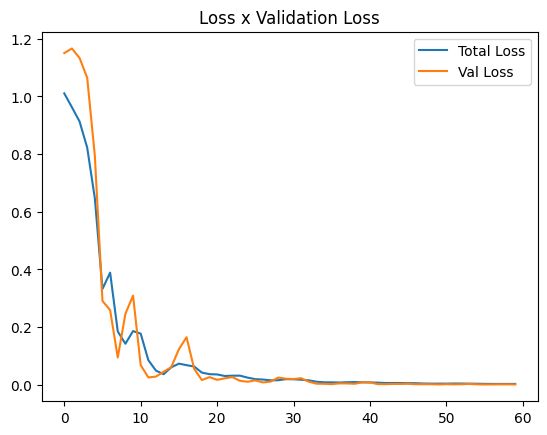

In [46]:
with torch.no_grad():

    plt.plot(total_loss, label = 'Total Loss')
    plt.plot(total_val_loss, label = 'Val Loss')
    plt.title('Loss x Validation Loss')
    plt.legend()

# Linear Regression

In [47]:
stock = "TSLA"
data = yf.download(stock, Begin_data, Today_data)

data.head(5)

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

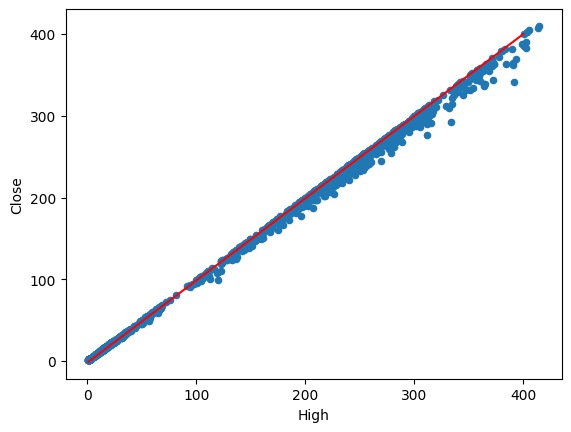

In [48]:
#data.plot.scatter("High","Close")
import matplotlib.pyplot as plt

data.plot.scatter("High","Close")
plt.plot([1,400], [-1,400], 'r')

Linear Regression Equation

y = mx + c

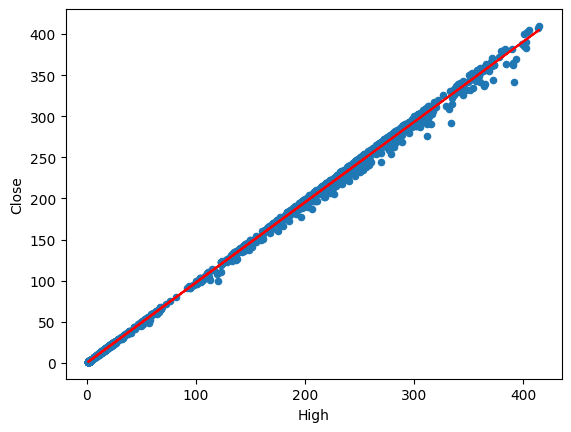

In [49]:
from sklearn.linear_model import LinearRegression

#Fit
lr = LinearRegression()
lr.fit(data[["High"]],data["Close"])

#plot
data.plot.scatter("High", "Close")
plt.plot(data["High"], lr.predict(data[["High"]]), color="r")

In [50]:
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

Weight: 0.98
Bias: 0.08


# implementation


In [51]:
PREDICTORS = ["High", "Low", "Open"]
TARGET = "Close"

# Ensure we get the same split every time
np.random.seed(0)

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

In [52]:
import math

def init_params(predictors):
  # Initialize model parameters
  k = math.sqrt(1/predictors)     #reduce weight and Biases initially

  # random check the same result
  np.random.seed(0)
  weights = np.random.rand(predictors, 1) * 2 * k - k
  biases = np.ones((1, 1)) * 2 * k - k
  return  [weights, biases]

In [53]:
def forward(params, x):
  weights, biases = params
  # Multiply x values by w values with matrix multiplication, then add b
  prediction = x @ weights + biases
  return prediction

def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return predicted - actual

def backward(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

In [54]:
lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])

# Store weights and gradients so we can visualize
# Not necessary for algorithm
sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    # Store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = params[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss}")

Epoch 0 validation loss: 11122.829215929578
Epoch 10000 validation loss: 42.561969545233346
Epoch 20000 validation loss: 31.735505990040338
Epoch 30000 validation loss: 25.19358378632872
Epoch 40000 validation loss: 21.151766152408666


In [55]:
params

[array([[0.31430803],
        [0.47768092],
        [0.20235285]]),
 array([[0.14918332]])]

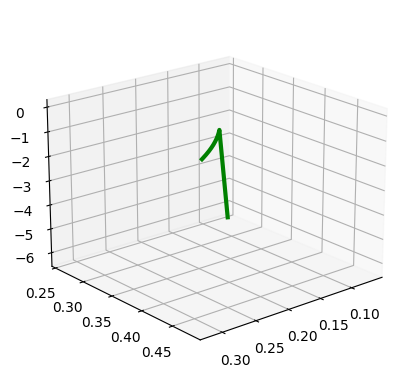

In [57]:
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20,50)

# Plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3, zorder=10)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# Replace these with your actual data
historical_ws = np.random.rand(100, 2)  # For 2D and 3D x, y coordinates
historical_gradient = np.random.rand(100)  # For 3D z coordinates

# Create a figure for the 3D plot
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Set the view angle for the 3D plot
ax_3d.view_init(20, 50)

# Plot the path of the optimization algorithm in 3D
ax_3d.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3)

# Create a figure for the 2D plot
fig_2d, ax_2d = plt.subplots()

# Plot the path of the optimization algorithm in 2D
ax_2d.plot(historical_ws[:,0], historical_ws[:,1], 'blue', linewidth=3)

# Show the plots
plt.show()


In [59]:
predictions = forward(params, test_x)
mse(test_y, predictions) #performance of regression models

31.57496614966336

# past

In [60]:
stock_symbols = ["TELA","NFLX","AAPL","MSFT","GOOGL"]

# Start and end dates
start_date = "2008-11-01"
end_date = "2023-11-01"

# Fetching stock data
stock_data = {}
for symbol in stock_symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Fetching stock data
stock_data = {symbol: yf.download(symbol, start=start_date, end=end_date) for symbol in stock_symbols}


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [61]:
# Statistical Summary
for symbol, data in stock_data.items():
    print(f"Statistical Summary for {symbol} Stock:")
    styled_description = data.describe().style.background_gradient(cmap='coolwarm')\
                                          .format("{:.2f}")\
                                          .set_table_attributes('style="font-size: 12px; border: 1px solid black;"')\
                                          .set_caption(f"Descriptive Statistics of {symbol}")
    display(styled_description)
    print("\n")

Statistical Summary for TELA Stock:




Statistical Summary for NFLX Stock:




Statistical Summary for AAPL Stock:




Statistical Summary for MSFT Stock:




Statistical Summary for GOOGL Stock:


In [62]:
import time
from datetime import datetime
# Handling missing Value
for symbol, data in stock_data.items():
  data.dropna(inplace = True)
  data.interpolate(inplace = True)

# Displaying the data
for symbol, data in stock_data.items():
    print(f"Stock data for {symbol}:\n")
    print(data.tail())
    #display(data())  # Display the first few rows of each stock's data
    print("\n")

Stock data for TELA:

            Open   High    Low  Close  Adj Close  Volume
Date                                                    
2023-10-25  6.03  6.120  5.800   6.07       6.07   72100
2023-10-26  5.99  6.180  5.760   5.97       5.97  111200
2023-10-27  6.00  6.000  5.630   5.82       5.82   79100
2023-10-30  5.85  5.898  5.645   5.82       5.82   50600
2023-10-31  5.83  5.950  5.680   5.84       5.84   75200


Stock data for NFLX:

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-25  416.019989  418.839996  410.109985  411.250000  411.250000   
2023-10-26  411.420013  417.309998  401.540009  403.540009  403.540009   
2023-10-27  406.420013  410.209991  395.619995  397.869995  397.869995   
2023-10-30  402.350006  412.820007  399.410004  410.079987  410.079987   
2023-10-31  409.239990  412.519989  404.630005  411.690002  411.690002   

             Volume  
Date          

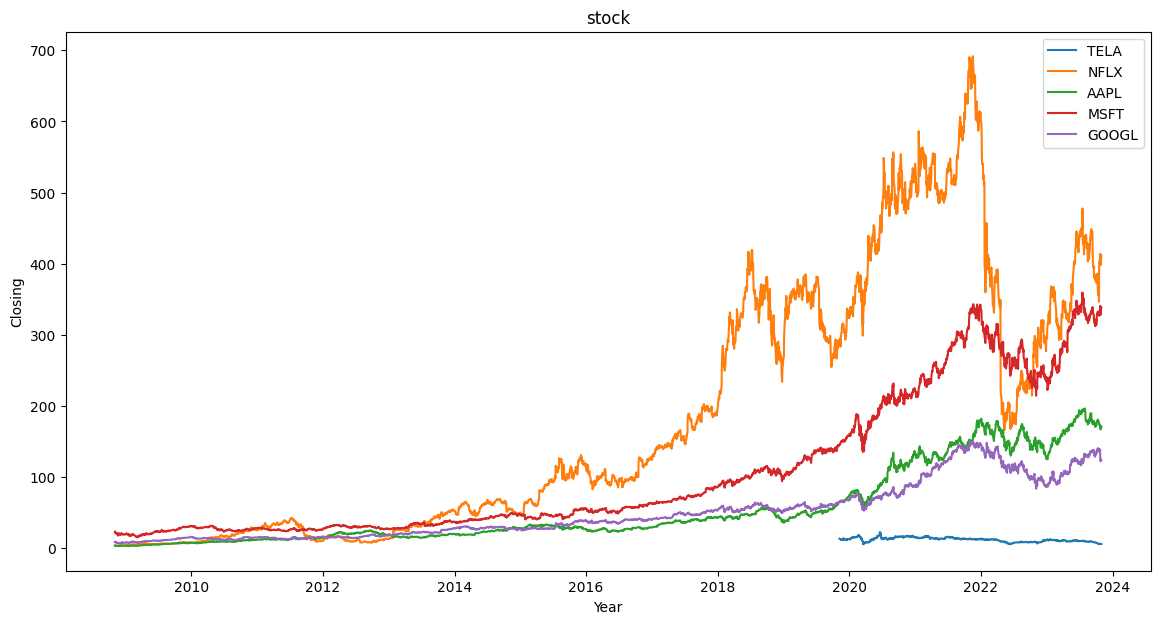

In [63]:
plt.figure(figsize = (14, 7))
for symbol, data in stock_data.items():
  plt.plot(data.index, data['Close'], label = f'{symbol}')
plt.title("stock")
plt.xlabel("Year")
plt.ylabel("Closing")
plt.legend()
plt.show()

# RNN Model Implementation

In [64]:
import tensorflow as tf
from tensorflow import keras

# testing soimething unknow

In [65]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.8)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.8): len(data)])

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

datas_train_scale = scaler.fit_transform(data_train)

In [67]:
x= []
y = []

for i in range(100, datas_train_scale.shape[0]):
  x.append(datas_train_scale[i-100:i])
  y.append(datas_train_scale[i: 0])

x, y = np.array(x), np.array(y)

In [68]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
92/92 [==============================] - 59s 548ms/step - loss: nan
Epoch 2/50
92/92 [==============================] - 57s 613ms/step - loss: nan
Epoch 3/50
92/92 [==============================] - 52s 567ms/step - loss: nan
Epoch 4/50
92/92 [==============================] - 45s 493ms/step - loss: nan
Epoch 5/50
92/92 [==============================] - 55s 596ms/step - loss: nan
Epoch 6/50
92/92 [==============================] - 46s 495ms/step - loss: nan
Epoch 7/50
92/92 [==============================] - 47s 514ms/step - loss: nan
Epoch 8/50
92/92 [==============================] - 45s 489ms/step - loss: nan
Epoch 9/50
92/92 [==============================] - 46s 504ms/step - loss: nan
Epoch 10/50
92/92 [==============================] - 46s 490ms/step - loss: nan
Epoch 11/50
92/92 [==============================] - 46s 506ms/step - loss: nan
Epoch 12/50
92/92 [==============================] - 45s 489ms/step - loss: nan
Epoch 13/50
92/92 [==============================

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

data_test = pd.concat([data_train.tail(100), data_test], ignore_index= True)
data_test_scale = scaler.fit_transform(data_test)
y_predict = model.predict(x)
Scale = 1/scaler.scale_

history = model.fit(x, y, epochs=50, batch_size=32, verbose=0)
predictions = model.predict(x)

plt.plot(history.history['loss'])
plt.plot(predictions.flatten())
plt.legend(['Loss', 'Predicted Price'])
plt.show()


In [ ]:
# Reshaping y_predict and y to be 1D arrays
#y_predict = y_predict.reshape(-1) * Scale
#y = y.reshape(-1) * Scale


plt.figure(figsize=(10,8))
'''plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.legend()'''
predicted_test_prices = model.predict(data_test_scale)
real_test_prices = scaler.inverse_transform(data_test)[:, 0]

plt.plot(real_test_prices)
plt.plot(predicted_test_prices.flatten() * Scale)
plt.legend(['Real Price', 'Predicted Price'])

plt.show()